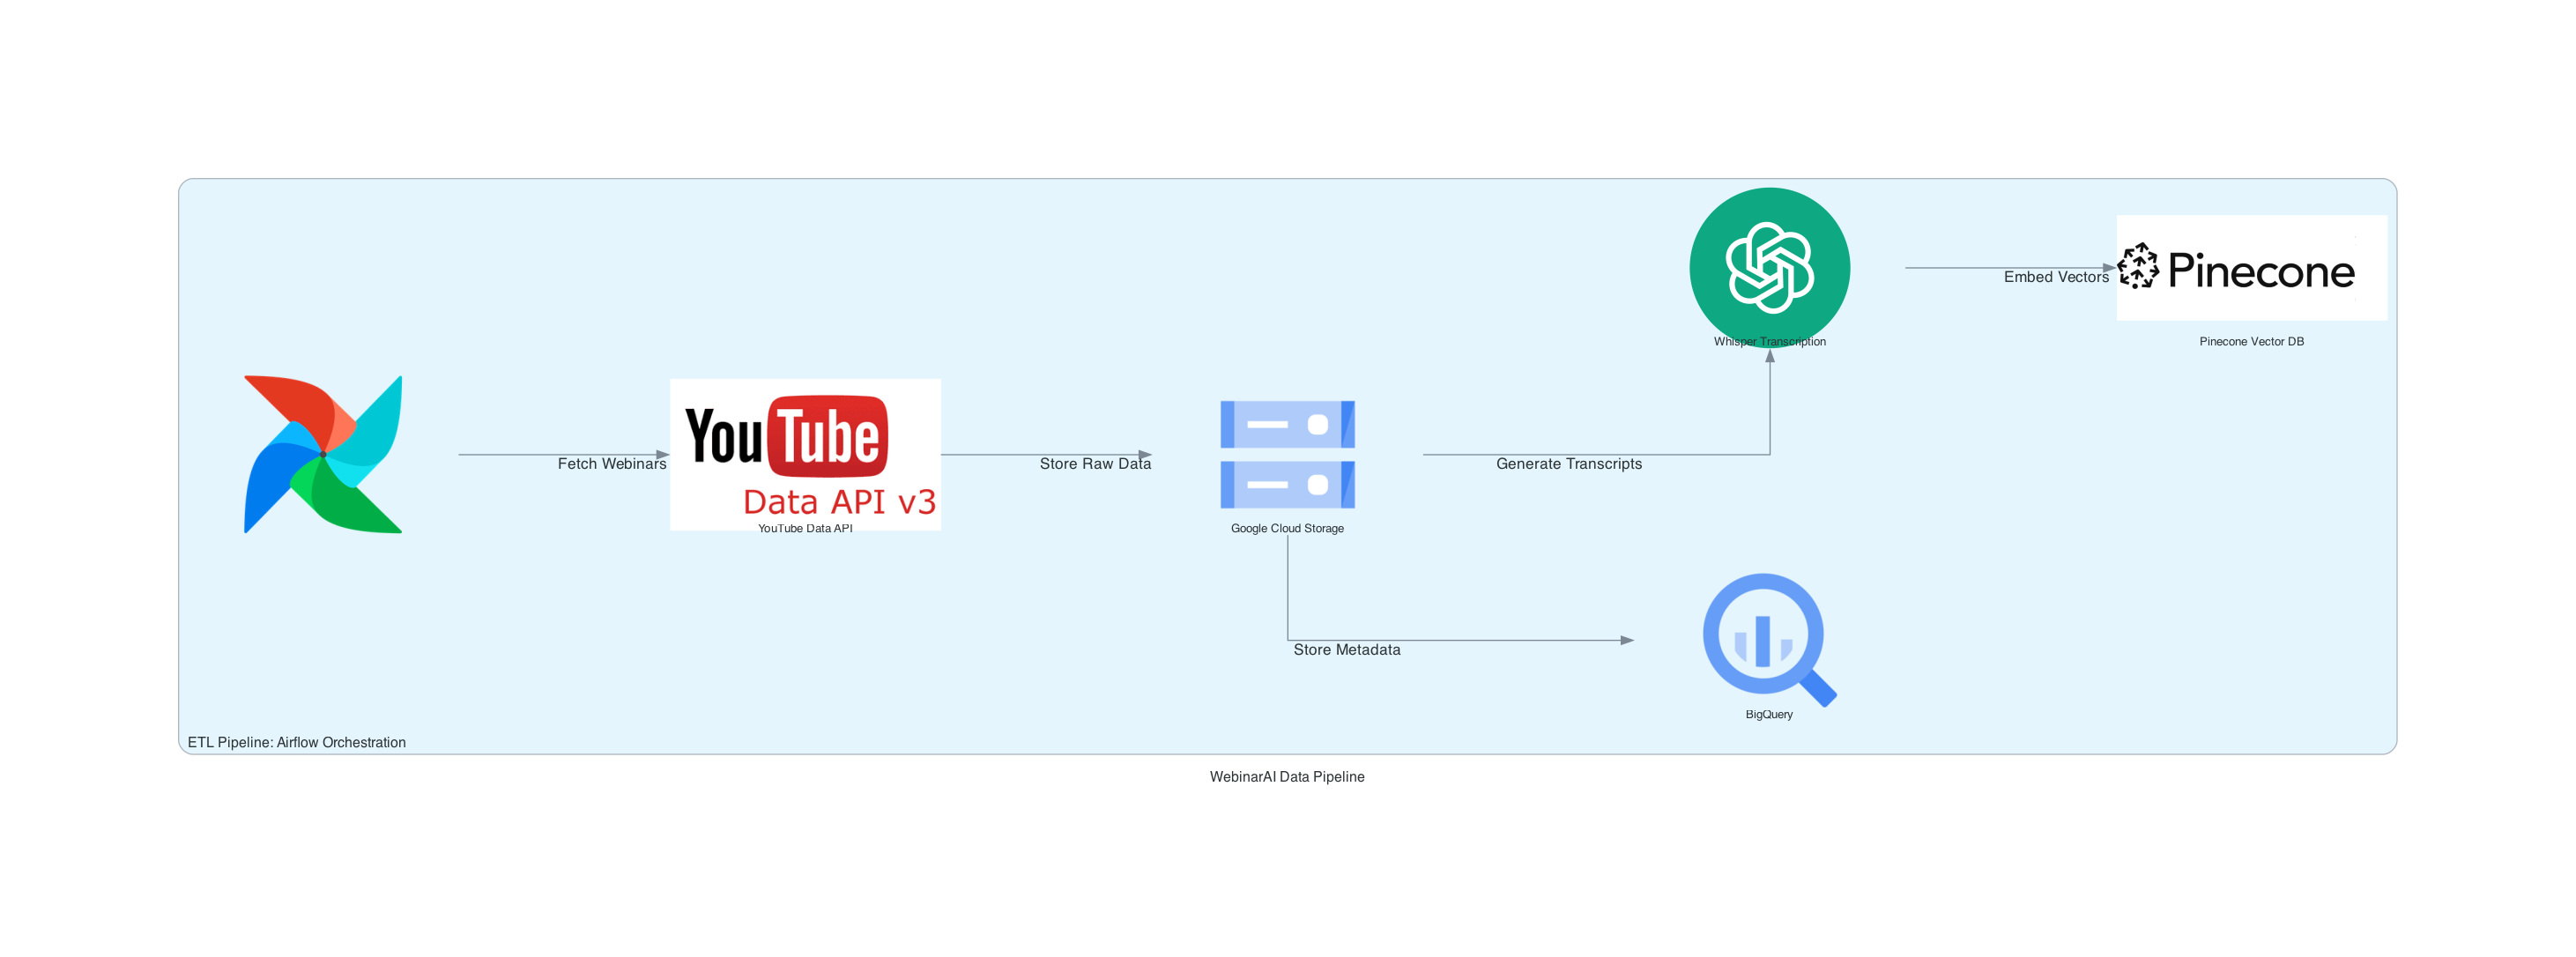

In [41]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.workflow import Airflow
from diagrams.gcp.storage import GCS
from diagrams.gcp.analytics import BigQuery
from diagrams.custom import Custom

# Define custom component icons
whisper_logo = "whisper_logo.png"
pinecone_logo = "pinecone_logo.png"
youtube_logo = "youtube_logo.png"

# Graph attributes for improved layout
graph_attr = {
    "fontsize": "12",          # Adjust font size for better layout
    "labelloc": "b",           # Position labels below nodes
    "nodesep": "2.5",          # Increased spacing between nodes
    "ranksep": "2.5",          # Increased spacing between layers
}

node_attr = {
    "fontsize": "10",          # Slightly smaller node text for clarity
    "width": "3.2",            # Larger width for text and logo separation
    "height": "2.0",           # Larger height for text and logo separation
}

# Diagram structure
with Diagram(
    "WebinarAI Data Pipeline",
    show=False,
    filename="webinar_ai_data_pipeline",
    outformat="png",
    graph_attr=graph_attr,
    node_attr=node_attr,
) as diag:
    # ETL Pipeline Layer
    with Cluster("ETL Pipeline: Airflow Orchestration"):
        airflow = Airflow("")
        youtube_api = Custom("YouTube Data API", youtube_logo)
        gcs = GCS("Google Cloud Storage")
        bigquery = BigQuery("BigQuery")
        whisper = Custom("Whisper Transcription", whisper_logo)
        pinecone_storage = Custom("Pinecone Vector DB", pinecone_logo)

        # Data pipeline flow
        airflow >> Edge(xlabel="Fetch Webinars") >> youtube_api
        youtube_api >> Edge(xlabel="Store Raw Data") >> gcs
        gcs >> Edge(xlabel="Store Metadata") >> bigquery
        gcs >> Edge(xlabel="Generate Transcripts") >> whisper
        whisper >> Edge(xlabel="Embed Vectors") >> pinecone_storage
diag